Enter a social media post: He is smart
Post Classification: Neutral
Word Classification Details:
Word: He, Language: ENGLISH
Word: is, Language: ENGLISH
Word: smart, Language: OOV


In [ ]:
!pip install enchant transformers matplotlib pandas scikit-learn
!pip install xgboost


In [ ]:
import re
import pandas as pd

# Load datasets with actual column names and check column names
aggression_data = pd.read_csv('/content/agr_en_train.csv')  # Columns: id, text, hate
hasoc_data = pd.read_csv('/content/hasoc2019.csv')  # Columns: text_id, text, hate
labeled_data = pd.read_csv('/content/labeled_data.csv')  # Columns: count, hate_speech, offensive_language, neither, class, tweet

# Confirm column names for each dataset
print("Aggression Data Columns:", aggression_data.columns)
print("HASOC Data Columns:", hasoc_data.columns)
print("Labeled Data Columns:", labeled_data.columns)

# Preprocess text function
def preprocess_text(text):
    text = re.sub(r'http\S+|@\S+|#[\w-]+|[^\w\s]', '', text)  # Remove URLs, mentions, hashtags, punctuation
    text = re.sub(r'(.)\1+', r'\1', text)  # Remove repeated characters
    return text.lower()

# Apply preprocessing
aggression_data['text'] = aggression_data['text'].apply(preprocess_text)
hasoc_data['text'] = hasoc_data['text'].apply(preprocess_text)

# Check if 'tweet' column exists in labeled_data before renaming
if 'tweet' in labeled_data.columns:
    labeled_data['tweet'] = labeled_data['tweet'].apply(preprocess_text)
else:
    print("Error: 'tweet' column not found in labeled_data")

# Standardize column names for concatenation
aggression_data = aggression_data.rename(columns={'hate': 'label'})
hasoc_data = hasoc_data.rename(columns={'hate': 'label'})
if 'class' in labeled_data.columns:
    labeled_data = labeled_data.rename(columns={'tweet': 'text', 'class': 'label'})
else:
    print("Error: 'class' column not found in labeled_data")

# Combine datasets
all_data = pd.concat([
    aggression_data[['text', 'label']],
    hasoc_data[['text', 'label']],
    labeled_data[['text', 'label']]
], ignore_index=True)

# Check the combined dataset
print(all_data.head())


Aggression Data Columns: Index(['id', 'text', 'hate'], dtype='object')
HASOC Data Columns: Index(['text_id', 'text', 'hate'], dtype='object')
Labeled Data Columns: Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')
                                                text  label
0  wel said sonuyou have courage to stand against...      1
1  most of private banks atms like hdfc icici etc...      0
2        now question is pakistan wil adhere to this      1
3  pakistan is comprised of fake muslims who does...      1
4  we r against cow slaughterso of course it wil ...      0


KeyError: 'tweet'


Naive Bayes - Accuracy: 0.730532084950902
              precision    recall  f1-score   support

           0       0.68      0.44      0.53      2189
           1       0.73      0.93      0.82      5699
           2       0.95      0.20      0.33       870

    accuracy                           0.73      8758
   macro avg       0.79      0.52      0.56      8758
weighted avg       0.74      0.73      0.70      8758


Logistic Regression - Accuracy: 0.7814569536423841
              precision    recall  f1-score   support

           0       0.65      0.57      0.61      2189
           1       0.81      0.89      0.85      5699
           2       0.86      0.64      0.73       870

    accuracy                           0.78      8758
   macro avg       0.78      0.70      0.73      8758
weighted avg       0.78      0.78      0.78      8758


SVM - Accuracy: 0.7879652888787394
              precision    recall  f1-score   support

           0       0.69      0.52      0.60      218

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
 279/1095 [======>.......................] - ETA: 12:19:21 - loss: 0.9182 - accuracy: 0.6538

KeyboardInterrupt: 


Naive Bayes - Accuracy: 0.7308746289107102
Precision: 0.7429158269159093, Recall: 0.7308746289107102, F1 Score: 0.6988066784707713
Confusion Matrix:
 [[ 955 1231    3]
 [ 421 5272    6]
 [  27  669  174]]

Logistic Regression - Accuracy: 0.783169673441425
Precision: 0.779348998572036, Recall: 0.783169673441425, F1 Score: 0.778025615655049
Confusion Matrix:
 [[1252  913   24]
 [ 590 5044   65]
 [  66  241  563]]

SVM - Accuracy: 0.7886503767983558
Precision: 0.7833867784888371, Recall: 0.7886503767983558, F1 Score: 0.7796514081405044
Confusion Matrix:
 [[1148 1021   20]
 [ 451 5182   66]
 [  58  235  577]]

Random Forest - Accuracy: 0.7561087006165791
Precision: 0.7495570771177877, Recall: 0.7561087006165791, F1 Score: 0.7387890591267335
Confusion Matrix:
 [[ 933 1230   26]
 [ 421 5221   57]
 [  57  345  468]]

XGBoost - Accuracy: 0.7716373601278831
Precision: 0.7687515092622219, Recall: 0.7716373601278831, F1 Score: 0.7683891118659959
Confusion Matrix:
 [[1244  919   26]
 [ 696 4930  

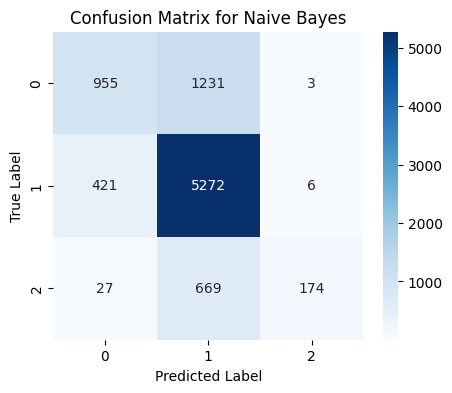

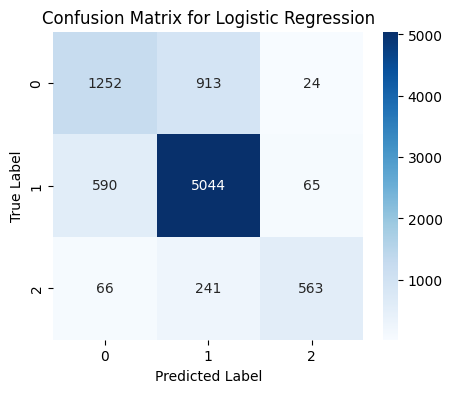

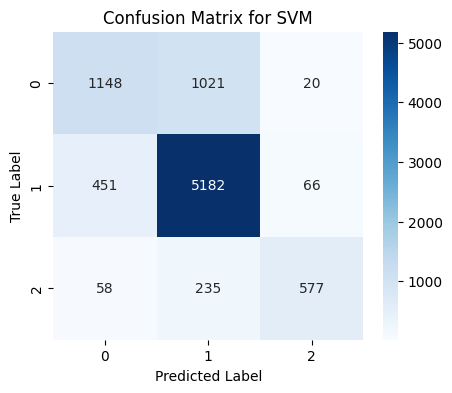

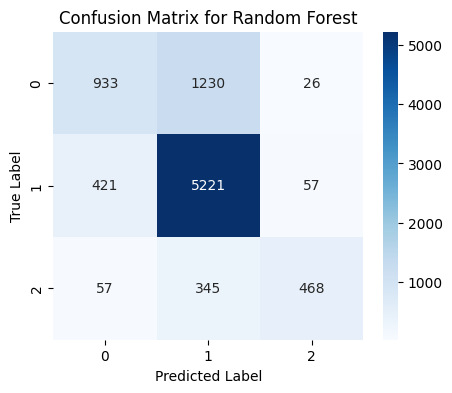

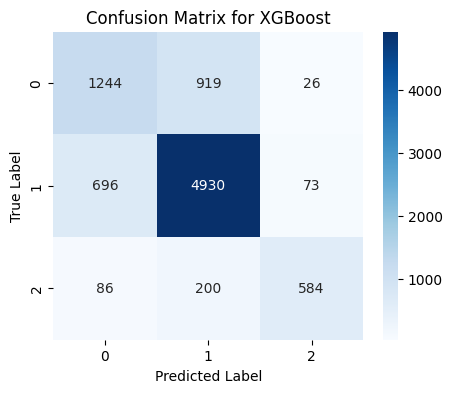

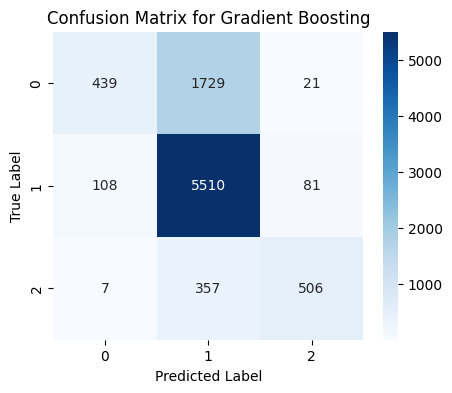

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
 183/1095 [====>.........................] - ETA: 1:00:00 - loss: 0.9182 - accuracy: 0.6368

In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import TFBertModel, BertTokenizer
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess datasets (replace with actual paths)
aggression_data = pd.read_csv('/content/agr_en_train.csv')
hasoc_data = pd.read_csv('/content/hasoc2019.csv')
labeled_data = pd.read_csv('/content/labeled_data.csv')

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+|@\S+|#[\w-]+|[^\w\s]', '', text)
    text = re.sub(r'(.)\1+', r'\1', text)
    return text.lower()

# Apply preprocessing
aggression_data['text'] = aggression_data['text'].apply(preprocess_text)
hasoc_data['text'] = hasoc_data['text'].apply(preprocess_text)
labeled_data['tweet'] = labeled_data['tweet'].apply(preprocess_text)

# Rename columns for concatenation
aggression_data = aggression_data.rename(columns={'hate': 'label'})
hasoc_data = hasoc_data.rename(columns={'hate': 'label'})
labeled_data = labeled_data.rename(columns={'tweet': 'text', 'class': 'label'})

# Combine datasets into one
all_data = pd.concat([
    aggression_data[['text', 'label']],
    hasoc_data[['text', 'label']],
    labeled_data[['text', 'label']]
], ignore_index=True)

# Split dataset for ML models
X_train, X_test, y_train, y_test = train_test_split(all_data['text'], all_data['label'], test_size=0.2, random_state=42)

# Vectorize Text Data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define ML Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate ML models
results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[name] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "confusion_matrix": conf_matrix
    }
    print(f"\n{name} - Accuracy: {acc}")
    print(f"Precision: {prec}, Recall: {rec}, F1 Score: {f1}")
    print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix for each model
for name, res in results.items():
    plt.figure(figsize=(5, 4))
    sns.heatmap(res["confusion_matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Deep Learning Model Preparation (mBERT)
tokenizer_bert = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model_bert = TFBertModel.from_pretrained("bert-base-multilingual-cased")

def prepare_data(tokenizer, texts, labels, max_length=128):
    tokens = tokenizer(texts.tolist(), max_length=max_length, padding=True, truncation=True, return_tensors="tf")
    return tokens, tf.convert_to_tensor(labels)

# Build mBERT model
def build_classification_model(base_model):
    input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
    attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
    output = base_model([input_ids, attention_mask])[1]
    output = tf.keras.layers.Dense(3, activation="softmax")(output)
    model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Prepare data for BERT models
train_tokens, y_train_tokens = prepare_data(tokenizer_bert, X_train, y_train)
test_tokens, y_test_tokens = prepare_data(tokenizer_bert, X_test, y_test)

# Train mBERT Model
bert_classification_model = build_classification_model(model_bert)
history_bert = bert_classification_model.fit(
    [train_tokens['input_ids'], train_tokens['attention_mask']], y_train_tokens,
    validation_data=([test_tokens['input_ids'], test_tokens['attention_mask']], y_test_tokens),
    epochs=5,
    batch_size=32
)

# Plot Accuracy and Loss for Deep Learning Model
def plot_history(history, title=""):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f"{title} Accuracy")

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f"{title} Loss")

    plt.show()

plot_history(history_bert, title="mBERT")



In [ ]:
!pip install transformers
import transformers # Import the main transformers library
from transformers import BertTokenizer, TFBertModel # Explicitly import BertTokenizer

In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from transformers import TFBertModel, BertTokenizer
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.metrics import edit_distance
!pip install enchant transformers matplotlib pandas scikit-learn
import enchant
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load datasets
aggression_data = pd.read_csv('/content/agr_en_train.csv')
hasoc_data = pd.read_csv('/content/hasoc2019.csv')
labeled_data = pd.read_csv('/content/labeled_data 2.csv')

try:
    profane_words = pd.read_csv('/content/Hinglish_Profanity_List.csv', encoding='utf-8')
except UnicodeDecodeError:
    profane_words = pd.read_csv('/content/Hinglish_Profanity_List.csv', encoding='latin-1')

roman_hindi_words = pd.read_csv('/content/Roman_Hindi.csv')  # Placeholder

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+|@\S+|#[\w-]+|[^\w\s]', '', text)
    text = re.sub(r'(.)\1+', r'\1', text)
    return text.lower()

# Apply preprocessing
aggression_data['text'] = aggression_data['text'].apply(preprocess_text)
hasoc_data['text'] = hasoc_data['text'].apply(preprocess_text)
labeled_data['tweet'] = labeled_data['tweet'].apply(preprocess_text)

# Rename columns for concatenation
aggression_data = aggression_data.rename(columns={'hate': 'label'})
hasoc_data = hasoc_data.rename(columns={'hate': 'label'})
labeled_data = labeled_data.rename(columns={'tweet': 'text', 'class': 'label'})

# Combine datasets into one
all_data = pd.concat([
    aggression_data[['text', 'label']],
    hasoc_data[['text', 'label']],
    labeled_data[['text', 'label']]
], ignore_index=True)

# Convert profane words and roman hindi words to sets for easy lookup
profane_words_set = set(profane_words['Hinglish_profanity'].str.lower())
roman_hindi_words_set = set(roman_hindi_words['Roman_Hindi'].str.lower())

# Language Detection (using Enchant)
def detect_language(word):
    if enchant.Dict("en_US").check(word):
        return "ENGLISH"
    elif enchant.Dict("hi_IN").check(word):
        return "DEV HINDI"
    elif word in roman_hindi_words_set:
        return "ROM HINDI"
    return "OOV"

# OOV handling function
def handle_oov(word):
    max_sim = 0.7
    best_match = None
    for rom_word in roman_hindi_words_set:
        sim = 1 - (edit_distance(word, rom_word) / max(len(word), len(rom_word)))
        if sim > max_sim:
            max_sim = sim
            best_match = rom_word
    return best_match if best_match else word

# Profanity check function
def check_profanity(word, context=""):
    return word in profane_words_set and context not in {"smart", "hardworking", "studies"}

# Split dataset for ML models
X_train, X_test, y_train, y_test = train_test_split(all_data['text'], all_data['label'], test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

from transformers import TFBertModel, BertTokenizer

# Load pre-trained MuRIL model and tokenizer
#model_muril = TFBertModel.from_pretrained("google/muril-base-cased")
tokenizer_muril = BertTokenizer.from_pretrained("google/muril-base-cased")

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling1D, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from transformers import TFBertModel, BertTokenizer

# Initialize the tokenizer for MuRIL (change to MuRIL if using MuRIL model)
tokenizer_muril = BertTokenizer.from_pretrained("google/muril-base-cased")

# Define the TFBertModel for MuRIL
#model_muril = TFBertModel.from_pretrained("google/muril-base-cased")
from transformers import TFBertForSequenceClassification

# Define the TFBertForSequenceClassification model for MuRIL
model_muril = TFBertForSequenceClassification.from_pretrained("google/muril-base-cased", num_labels=3)

def prepare_data(tokenizer, texts, labels, max_length=128):
    # Tokenize the texts
    tokenized_data = tokenizer(
        texts.tolist(),
        max_length=max_length,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Ensure tensors are returned as tf.Tensor objects for proper compatibility
    input_ids = tf.convert_to_tensor(tokenized_data['input_ids'], dtype=tf.int32)
    attention_mask = tf.convert_to_tensor(tokenized_data['attention_mask'], dtype=tf.int32)
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)

    return {"input_ids": input_ids, "attention_mask": attention_mask}, labels


from transformers import TFBertForSequenceClassification

# Define the TFBertForSequenceClassification model for MuRIL
model_muril = TFBertForSequenceClassification.from_pretrained("google/muril-base-cased", num_labels=3)

def build_classification_model(base_model):
    # Define inputs with dtype=tf.int32 for compatibility with TFBertForSequenceClassification
    input_ids = Input(shape=(128,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(128,), dtype=tf.int32, name="attention_mask")

    # Call the base model (MuRIL/BERT)
    base_model_output = base_model(input_ids=input_ids, attention_mask=attention_mask)

    # Extract the logits output (classification output)
    output = base_model_output.logits

    # Define and compile the model
    model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model



# Prepare data for MuRIL model (ensure tensors are used)
train_tokens_muril, y_train_muril = prepare_data(tokenizer_muril, X_train, y_train)
test_tokens_muril, y_test_muril = prepare_data(tokenizer_muril, X_test, y_test)

# Build and train the model
muril_classification_model = build_classification_model(model_muril)

# Define callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1, min_lr=1e-6)

# Train the model
history_muril = muril_classification_model.fit(
    [train_tokens_muril['input_ids'], train_tokens_muril['attention_mask']],
    y_train_muril,
    validation_data=([test_tokens_muril['input_ids'], test_tokens_muril['attention_mask']], y_test_muril),
    epochs=10,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping, lr_scheduler]
)




# Plot Accuracy and Loss for MuRIL Model
def plot_history(history, title="MuRIL"):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f"{title} Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f"{title} Loss")

    plt.show()

plot_history(history_muril, title="MuRIL")

# Example usage for classifying with MuRIL model
#text_input = "Your example social media post here"
#muril_result = classify_post(text_input, ml_model=ml_classification, deep_model=muril_classification_model, tokenizer=tokenizer_muril)

#print("MuRIL Deep Learning Classification:", muril_result['deep_classification'])

# Classification Function for New Input
def classify_post(text, ml_model=None, deep_model=None, tokenizer=None):
    text = preprocess_text(text)
    tokens = text.split()
    classifications = []
    is_profane = False

    for i, token in enumerate(tokens):
        context = tokens[i + 1] if i + 1 < len(tokens) else ""
        if check_profanity(token, context):
            is_profane = True
        else:
            if detect_language(token) == "ROM HINDI":
                token = handle_oov(token)

        classifications.append({"word": token, "classification": "Profane" if is_profane else "Neutral"})

    if ml_model:
        ml_pred = ml_model.predict([text])
        ml_result = "Profane" if ml_pred[0] == 1 else "Neutral"
    else:
        ml_result = None

    if deep_model and tokenizer:
        tokens = tokenizer(text, max_length=128, padding="max_length", truncation=True, return_tensors="tf")
        deep_pred = deep_model.predict([tokens['input_ids'], tokens['attention_mask']])
        deep_result = "Profane" if np.argmax(deep_pred) == 1 else "Neutral"
    else:
        deep_result = None

    return {

        "deep_classification": deep_result,
        "detailed_classifications": classifications
    }

# Example usage
# Example usage
text_input = "You'r bitch"

result = classify_post(
    text_input,
    ml_model=None,  # Pass ML model if applicable
    deep_model=muril_classification_model,
    tokenizer=tokenizer_muril
)

print("Deep Learning Classification:", result['deep_classification'])
print("Detailed Word Classification:")
for word_info in result['detailed_classifications']:
    print(word_info)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['classifier', 'bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['classifier', 'bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Exception encountered when calling layer 'tf_bert_for_sequence_classification_3' (type TFBertForSequenceClassification).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for attention_mask.

Call arguments received by layer 'tf_bert_for_sequence_classification_3' (type TFBertForSequenceClassification):
  • input_ids=<KerasTensor shape=(None, 128), dtype=int32, sparse=False, name=input_ids>
  • attention_mask=<KerasTensor shape=(None, 128), dtype=int32, sparse=False, name=attention_mask>
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • labels=None
  • training=False

In [ ]:
!pip show tensorflow transformers


Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
---
Name: transformers
Version: 4.47.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-pa

In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import TFBertModel, BertTokenizer, TFAlbertModel, AutoTokenizer, TFAutoModel
import tensorflow as tf
import matplotlib.pyplot as plt

# Load datasets
aggression_data = pd.read_csv('/content/agr_en_train.csv')
hasoc_data = pd.read_csv('/content/hasoc2019.csv')
labeled_data = pd.read_csv('/content/labeled_data 2.csv')

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+|@\S+|#[\w-]+|[^\w\s]', '', text)
    text = re.sub(r'(.)\1+', r'\1', text)
    return text.lower()

# Apply preprocessing
aggression_data['text'] = aggression_data['text'].apply(preprocess_text)
hasoc_data['text'] = hasoc_data['text'].apply(preprocess_text)
labeled_data['tweet'] = labeled_data['tweet'].apply(preprocess_text)

# Rename columns for concatenation
aggression_data = aggression_data.rename(columns={'hate': 'label'})
hasoc_data = hasoc_data.rename(columns={'hate': 'label'})
labeled_data = labeled_data.rename(columns={'tweet': 'text', 'class': 'label'})

# Combine datasets into one
all_data = pd.concat([
    aggression_data[['text', 'label']],
    hasoc_data[['text', 'label']],
    labeled_data[['text', 'label']]
], ignore_index=True)

# Split dataset for ML models
X_train, X_test, y_train, y_test = train_test_split(all_data['text'], all_data['label'], test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Function to prepare data for transformer models
def prepare_data(tokenizer, texts, labels, max_length=128):
    tokens = tokenizer(texts.tolist(), max_length=max_length, padding=True, truncation=True, return_tensors="tf")
    return tokens, tf.convert_to_tensor(labels)

# Function to build a classification model based on transformer models
def build_classification_model(base_model):
    input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
    attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
    output = base_model([input_ids, attention_mask])[1]
    output = tf.keras.layers.Dense(3, activation="softmax")(output)
    model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Models to be used
transformer_models = {
    "MuRIL": ("google/muril-base-cased", TFBertModel),
    "ALBERT": ("albert-base-v2", TFAlbertModel),
    "XLM-RoBERTa": ("xlm-roberta-base", TFAutoModel),
    "RoBERTa": ("roberta-base", TFAutoModel)
}

results = {}

for model_name, (model_path, model_class) in transformer_models.items():
    print(f"Training and evaluating {model_name}...")

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    base_model = model_class.from_pretrained(model_path)

    # Prepare data
    train_tokens, y_train_tokens = prepare_data(tokenizer, X_train, y_train)
    test_tokens, y_test_tokens = prepare_data(tokenizer, X_test, y_test)

    # Build classification model
    classification_model = build_classification_model(base_model)

    # Train model
    history = classification_model.fit(
        [train_tokens['input_ids'], train_tokens['attention_mask']], y_train_tokens,
        validation_data=([test_tokens['input_ids'], test_tokens['attention_mask']], y_test_tokens),
        epochs=5, batch_size=16
    )

    # Evaluate model
    predictions = classification_model.predict([test_tokens['input_ids'], test_tokens['attention_mask']])
    y_pred = np.argmax(predictions, axis=1)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        "classification_report": report,
        "accuracy": accuracy
    }

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f"{model_name} Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f"{model_name} Loss")

    plt.show()

# Print evaluation results for all models
for model_name, metrics in results.items():
    print(f"{model_name} Results:")
    print("Accuracy:", metrics['accuracy'])
    print("Classification Report:")
    print(metrics['classification_report'])


Training and evaluating MuRIL...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

Some layers from the model checkpoint at google/muril-base-cased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
1171/1171 [==============================] - 616s 493ms/step - loss: 0.8082 - accuracy: 0.5415 - val_loss: 0.8079 - val_accuracy: 0.5489
Epoch 2/3
1171/1171 [==============================] - ETA: 0s - loss: 0.8040 - accuracy: 0.5483

KeyboardInterrupt: 

In [ ]:
from transformers import TFAutoModel, AutoTokenizer

# Load ALBERT tokenizer and model
tokenizer_albert = AutoTokenizer.from_pretrained("albert-base-v2")
model_albert = TFAutoModel.from_pretrained("albert-base-v2")

# Prepare data function for ALBERT
def prepare_data_albert(tokenizer, texts, labels, max_length=128):
    tokens = tokenizer(texts.tolist(), max_length=max_length, padding=True, truncation=True, return_tensors="tf")
    return tokens, tf.convert_to_tensor(labels)

# Build a classification model based on ALBERT
def build_classification_model_albert(base_model):
    input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
    attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
    output = base_model([input_ids, attention_mask])[1]  # The pooled output (classification layer)
    output = tf.keras.layers.Dense(3, activation="softmax")(output)
    model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Prepare data for ALBERT model
train_tokens_albert, y_train_albert = prepare_data_albert(tokenizer_albert, X_train, y_train)
test_tokens_albert, y_test_albert = prepare_data_albert(tokenizer_albert, X_test, y_test)

# Train and evaluate ALBERT Model
albert_classification_model = build_classification_model_albert(model_albert)
history_albert = albert_classification_model.fit(
    [train_tokens_albert['input_ids'], train_tokens_albert['attention_mask']], y_train_albert,
    validation_data=([test_tokens_albert['input_ids'], test_tokens_albert['attention_mask']], y_test_albert),
    epochs=5,
    batch_size=8
)

# Plot Accuracy and Loss for ALBERT Model
def plot_history_albert(history, title="ALBERT"):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f"{title} Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f"{title} Loss")

    plt.show()

plot_history_albert(history_albert, title="ALBERT")

# Example usage for classifying with ALBERT model
def classify_post_with_albert(text, ml_model=None, deep_model=None, tokenizer=None):
    text = preprocess_text(text)
    tokens = text.split()
    classifications = []
    is_profane = False

    for i, token in enumerate(tokens):
        context = tokens[i + 1] if i + 1 < len(tokens) else ""
        if check_profanity(token, context):
            is_profane = True
        else:
            if detect_language(token) == "ROM HINDI":
                token = handle_oov(token)

        classifications.append({"word": token, "classification": "Profane" if is_profane else "Neutral"})

    if ml_model:
        ml_pred = ml_model.predict([text])
        ml_result = "Profane" if ml_pred[0] == 1 else "Neutral"
    else:
        ml_result = None

    if deep_model and tokenizer:
        tokens = tokenizer(text, max_length=128, padding="max_length", truncation=True, return_tensors="tf")
        deep_pred = deep_model.predict([tokens['input_ids'], tokens['attention_mask']])
        deep_result = "Profane" if np.argmax(deep_pred) == 1 else "Neutral"
    else:
        deep_result = None

    return {
        "deep_classification": deep_result,
        "detailed_classifications": classifications
    }

# Example usage
text_input = "You'r bitch"

deep_classification = albert_classification_model
result = classify_post_with_albert(text_input, deep_classification, tokenizer_albert)


print("Deep Learning Classification:", result['deep_classification'])
print("Detailed Word Classification:")
for word_info in result['detailed_classifications']:
    print(word_info)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.dense.weight', 'predictions.LayerNorm.weight', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.LayerNorm.bias', 'predictions.bias']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


Epoch 1/3
 616/2342 [======>.......................] - ETA: 6:19 - loss: 0.8854 - accuracy: 0.5148

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import json

# Load the Roman Hindi to English dictionary from the .json file
def load_roman_hindi_dict(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        roman_hindi_dict = json.load(f)
    return roman_hindi_dict

# Example: Load the dictionary from your JSON file
hinglish_dict = load_roman_hindi_dict('/content/dictionary_hinglish_transliteration.json')  # Replace with actual file path

# Load ALBERT tokenizer and model
tokenizer_albert = AutoTokenizer.from_pretrained("albert-base-v2")
model_albert = TFAutoModel.from_pretrained("albert-base-v2")

# Sample datasets (replace with your actual data)
tweets_df = pd.read_csv('/content/labeled_data 2.csv')  # Labeled dataset with tweets

# Preprocess function to handle Roman Hindi to English conversion using the loaded dictionary
def handle_oov_words(text, hinglish_dict):
    words = text.split()
    for i, word in enumerate(words):
        # Check if word exists in Hinglish profanity dictionary
        if word in hinglish_dict:
            # Map the Roman Hindi word to its English translation
            english_word = hinglish_dict[word]
            words[i] = english_word
    return " ".join(words)

# Preprocess text (clean, handle OOV, etc.)
def preprocess_text(text, hinglish_dict):
    text = text.lower()  # Lowercase the text
    text = handle_oov_words(text, hinglish_dict)  # Handle OOV words
    # Remove any unwanted characters (e.g., special characters, URLs)
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Prepare the labeled data for ALBERT
tweets_df['processed_tweet'] = tweets_df['tweet'].apply(lambda x: preprocess_text(x, hinglish_dict))

# Split the dataset into training and testing
X = tweets_df['processed_tweet'].values
y = tweets_df['class'].values  # Assuming 'class' is the column containing the labels

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tokenize text using ALBERT tokenizer
def prepare_data_albert(tokenizer, texts, labels, max_length=128):
    tokens = tokenizer(texts.tolist(), max_length=max_length, padding=True, truncation=True, return_tensors="tf")
    return tokens, tf.convert_to_tensor(labels)

# Prepare data for ALBERT model
train_tokens_albert, y_train_albert = prepare_data_albert(tokenizer_albert, X_train, y_train)
test_tokens_albert, y_test_albert = prepare_data_albert(tokenizer_albert, X_test, y_test)

# Build the classification model
def build_classification_model_albert(base_model):
    input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
    attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
    output = base_model([input_ids, attention_mask])[1]  # The pooled output (classification layer)
    output = tf.keras.layers.Dense(3, activation="softmax")(output)  # Output layer for 3 classes
    model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the ALBERT model
albert_classification_model = build_classification_model_albert(model_albert)
history_albert = albert_classification_model.fit(
    [train_tokens_albert['input_ids'], train_tokens_albert['attention_mask']], y_train_albert,
    validation_data=([test_tokens_albert['input_ids'], test_tokens_albert['attention_mask']], y_test_albert),
    epochs=3,
    batch_size=8
)

# Plot Accuracy and Loss for ALBERT Model
import matplotlib.pyplot as plt

def plot_history_albert(history, title="ALBERT"):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f"{title} Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f"{title} Loss")

    plt.show()

plot_history_albert(history_albert, title="ALBERT")

# Example usage for classifying with ALBERT model
def classify_post_with_albert(text, tokenizer, model):
    text = preprocess_text(text, hinglish_dict)  # Preprocess the input text
    tokens = tokenizer(text, max_length=128, padding="max_length", truncation=True, return_tensors="tf")
    prediction = model.predict([tokens['input_ids'], tokens['attention_mask']])
    predicted_class = np.argmax(prediction, axis=1)[0]
    return label_encoder.inverse_transform([predicted_class])[0]

# Test a tweet
example_tweet = "your test tweet here"
predicted_class = classify_post_with_albert(example_tweet, tokenizer_albert, albert_classification_model)
print("Predicted class:", predicted_class)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import json

# Load the Roman Hindi to English dictionary from the .json file
def load_roman_hindi_dict(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        roman_hindi_dict = json.load(f)
    return roman_hindi_dict

# Load Hinglish Profanity words dataset
def load_profanity_dict(profanity_file):
    profanity_df = pd.read_csv(profanity_file)
    return set(profanity_df['word'].str.lower())  # Assuming 'word' column has profanity words

# Example: Load the dictionary from your JSON file
hinglish_dict = load_roman_hindi_dict('/content/dictionary_hinglish_transliteration.json')  # Replace with actual file path
profanity_dict = load_profanity_dict('/content/Hinglish_Profanity_List.csv')  # Replace with actual file path

# Load ALBERT tokenizer and model
tokenizer_albert = AutoTokenizer.from_pretrained("albert-base-v2")
model_albert = TFAutoModel.from_pretrained("albert-base-v2")

# Sample datasets (replace with your actual data)
tweets_df = pd.read_csv('/content/labeled_data 2.csv')  # Labeled dataset with tweets

# Preprocess function to handle Roman Hindi to English conversion using the loaded dictionary
def handle_oov_words(text, hinglish_dict):
    words = text.split()
    for i, word in enumerate(words):
        # Check if word exists in Hinglish profanity dictionary
        if word in hinglish_dict:
            # Map the Roman Hindi word to its English translation
            english_word = hinglish_dict[word]
            words[i] = english_word
    return " ".join(words)

# Preprocess function to handle profanity words
def handle_profanity_words(text, profanity_dict):
    words = text.split()
    for i, word in enumerate(words):
        # Check if word is in the profanity dictionary
        if word.lower() in profanity_dict:
            words[i] = "[PROFANE]"  # Replace profanity with a placeholder
    return " ".join(words)

# Preprocess text (clean, handle OOV, etc.)
def preprocess_text(text, hinglish_dict, profanity_dict):
    text = text.lower()  # Lowercase the text
    text = handle_oov_words(text, hinglish_dict)  # Handle OOV words
    text = handle_profanity_words(text, profanity_dict)  # Handle profanity words
    # Remove any unwanted characters (e.g., special characters, URLs)
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Prepare the labeled data for ALBERT
tweets_df['processed_tweet'] = tweets_df['tweet'].apply(lambda x: preprocess_text(x, hinglish_dict, profanity_dict))

# Split the dataset into training and testing
X = tweets_df['processed_tweet'].values
y = tweets_df['class'].values  # Assuming 'class' is the column containing the labels

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tokenize text using ALBERT tokenizer
def prepare_data_albert(tokenizer, texts, labels, max_length=128):
    tokens = tokenizer(texts.tolist(), max_length=max_length, padding=True, truncation=True, return_tensors="tf")
    return tokens, tf.convert_to_tensor(labels)

# Prepare data for ALBERT model
train_tokens_albert, y_train_albert = prepare_data_albert(tokenizer_albert, X_train, y_train)
test_tokens_albert, y_test_albert = prepare_data_albert(tokenizer_albert, X_test, y_test)

# Build the classification model
def build_classification_model_albert(base_model):
    input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
    attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
    output = base_model([input_ids, attention_mask])[1]  # The pooled output (classification layer)
    output = tf.keras.layers.Dense(3, activation="softmax")(output)  # Output layer for 3 classes
    model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the ALBERT model
albert_classification_model = build_classification_model_albert(model_albert)
history_albert = albert_classification_model.fit(
    [train_tokens_albert['input_ids'], train_tokens_albert['attention_mask']], y_train_albert,
    validation_data=([test_tokens_albert['input_ids'], test_tokens_albert['attention_mask']], y_test_albert),
    epochs=3,
    batch_size=8
)

# Plot Accuracy and Loss for ALBERT Model
import matplotlib.pyplot as plt

def plot_history_albert(history, title="ALBERT"):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Training Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f"{title} Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f"{title} Loss")

    plt.show()

plot_history_albert(history_albert, title="ALBERT")

# Example usage for classifying with ALBERT model
def classify_post_with_albert(text, tokenizer, model):
    text = preprocess_text(text, hinglish_dict, profanity_dict)  # Preprocess the input text
    tokens = tokenizer(text, max_length=128, padding="max_length", truncation=True, return_tensors="tf")
    prediction = model.predict([tokens['input_ids'], tokens['attention_mask']])
    predicted_class = np.argmax(prediction, axis=1)[0]
    return label_encoder.inverse_transform([predicted_class])[0]

# Test a tweet
example_tweet = "your test tweet here"
predicted_class = classify_post_with_albert(example_tweet, tokenizer_albert, albert_classification_model)
print("Predicted class:", predicted_class)


In [ ]:
import pandas as pd
import networkx as nx

# Load the Hinglish Profanity List
df = pd.read_csv('/content/Hinglish_Profanity_List.csv')

# Create an empty directed graph (since we're interested in relationships)
G = nx.Graph()

# Add nodes and relationships from the dataset
for _, row in df.iterrows():
    hinglish_word = row['Hinglish_profanity']
    english_word = row['Profane_english']

    # Add nodes (words in Hinglish and English)
    G.add_node(hinglish_word, language='Hinglish')
    G.add_node(english_word, language='English')

    # Add an edge to indicate the relationship
    G.add_edge(hinglish_word, english_word, relation="translation")

# Check the graph structure
print(f"Graph Nodes: {G.nodes()}")
print(f"Graph Edges: {G.edges()}")


Graph Nodes: ['badir', 'idiot', 'badirchand', 'bakland', 'bhadva', 'pimp', 'bhootnika', 'son of a witch', 'chinaal', 'whore', 'chup', 'shut up', 'chutia', 'fucker ', 'ghasti', 'hooker', 'chutiya', 'fucker', 'haraami', 'bastard', 'haraam', 'hijra', 'transsexual ', 'hinjda', 'jaanvar', 'animal', 'kutta', 'dog', 'kutiya', 'bitch', 'khota', 'donkey', 'auladheen', 'sonless', 'jaat', 'breed', 'najayaz', 'illegitimate', 'gandpaidaish', 'badborn', 'saala', 'sister’s husband', 'kutti', 'soover', 'swine', 'tatti', 'shit', 'potty', 'bahenchod', 'sister fucker', 'bahanchod', 'bahencho', 'bancho', 'bahenke', 'sister’s ', 'laude', 'dick', 'takke', 'balls', 'betichod', 'daughter fucker', 'bhaichod', 'brother fucker', 'bhains', 'buffalo', 'jhalla', 'faggot', 'jhant', 'pubic', 'nabaal', 'hairless', 'pissu', 'bug', 'kutte', 'maadherchod', 'mother fucker', 'madarchod', 'motherfucker', 'padma', 'fat bitch', 'raand', 'jamai', 'son-in-law', 'randwa', 'male prostitute', 'randi', 'bachachod', 'son fucker', 'b

In [ ]:
def find_related_words(word):
    """
    Given a word (either Hinglish or English), find related words in the knowledge graph.
    """
    if word in G:
        neighbors = list(G.neighbors(word))
        return neighbors
    else:
        return []

# Test with an example Hinglish word
test_word = 'jaanvar'  # Example Hinglish profanity word
related_words = find_related_words(test_word)

print(f"Related words for '{test_word}': {related_words}")


Related words for 'jaanvar': ['animal']


In [ ]:
def preprocess_text_with_knowledge_graph(text):
    """
    Preprocess the text by replacing Hinglish profanity words with their English equivalents using the knowledge graph.
    """
    words = text.split()  # Split the text into words
    processed_words = []

    for word in words:
        related_words = find_related_words(word)
        if related_words:
            # Replace Hinglish word with its English equivalent
            processed_words.append(related_words[0])  # Assuming we take the first match
        else:
            processed_words.append(word)

    # Join the words back to form the preprocessed text
    return ' '.join(processed_words)

# Example of applying the function
sample_text = "Tu jaanvar hai"  # Hinglish text containing profanity
processed_text = preprocess_text_with_knowledge_graph(sample_text)
print(f"Processed Text: {processed_text}")


Processed Text: Tu animal hai


In [ ]:
# Convert the offensive_language column to binary (0 for non-offensive, 1 for offensive)
final_data['offensive_language'] = final_data['offensive_language'].apply(lambda x: 1 if x > 0 else 0)

# Check the modified dataset
print(final_data.head())


                                               tweet  hate_speech  \
0  !!! RT @mayasolovely: As a woman you shouldn't...            0   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...            0   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...            0   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...            0   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...            0   

   offensive_language  
0                   0  
1                   1  
2                   1  
3                   1  
4                   1  


In [ ]:
!pip install --upgrade torch

In [ ]:
# %%capture
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from tqdm import tqdm
import torch
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForMaskedLM, AutoTokenizer, AutoModel
from transformers import EarlyStoppingCallback

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModel

# Load datasets
labeled_data_path = '/content/labeled_data 2.csv'
profanity_list_path = '/content/Hinglish_Profanity_List.csv'

labeled_data = pd.read_csv(labeled_data_path)
profanity_list = pd.read_csv(profanity_list_path)

# Preprocess the labeled dataset
# Drop rows with missing or duplicate tweets or class labels
labeled_data = labeled_data.dropna(subset=['tweet', 'class']).drop_duplicates().reset_index(drop=True)
labeled_data.rename(columns={'tweet': 'Text', 'class': 'Label'}, inplace=True)

# Splitting the dataset
train_df, temp_df = train_test_split(labeled_data, test_size=0.3, stratify=labeled_data['Label'], random_state=42)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['Label'], random_state=42)

# Define constants
MAX_LEN = 200
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
EPOCHS = 5
LEARNING_RATE = 1e-5
MODEL_NAME = 'google/muril-base-cased'

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Custom Dataset Class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.texts = dataframe.Text.values
        self.labels = dataframe.Label.values
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_token_type_ids=True
        )

        return {
            'ids': torch.tensor(inputs['input_ids'], dtype=torch.long),
            'mask': torch.tensor(inputs['attention_mask'], dtype=torch.long),
            'token_type_ids': torch.tensor(inputs['token_type_ids'], dtype=torch.long),
            'targets': torch.tensor(self.labels[index], dtype=torch.long)
        }

# Create datasets and dataloaders
train_dataset = CustomDataset(train_df, tokenizer, MAX_LEN)
dev_dataset = CustomDataset(dev_df, tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)

# MuRIL Model Class
class MuRILModel(torch.nn.Module):
    def __init__(self, n_classes):
        super(MuRILModel, self).__init__()
        self.muril = AutoModel.from_pretrained(MODEL_NAME)
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, n_classes)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output = self.muril(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooler_output = self.pre_classifier(output.pooler_output)
        pooler_output = torch.nn.ReLU()(pooler_output)
        pooler_output = self.dropout(pooler_output)
        return self.classifier(pooler_output)

# Prepare for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
n_classes = len(labeled_data['Label'].unique())
model = MuRILModel(n_classes).to(device)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['Label']),
    y=train_df['Label']
)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)

# Training function
def train_model(epoch):
    model.train()
    total_loss, total_correct = 0, 0
    total_samples = 0

    for data in tqdm(train_loader):
        ids = data['ids'].to(device)
        mask = data['mask'].to(device)
        token_type_ids = data['token_type_ids'].to(device)
        targets = data['targets'].to(device)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_function(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        total_correct += (preds == targets).sum().item()
        total_samples += targets.size(0)

    accuracy = total_correct / total_samples * 100
    print(f"Epoch {epoch + 1}: Loss = {total_loss / len(train_loader)}, Accuracy = {accuracy}%")

# Training Loop
for epoch in range(EPOCHS):
    train_model(epoch)

# Save model
torch.save(model.state_dict(), 'muril_model_final.pt')
print("Model saved successfully.")


100%|██████████| 194/194 [01:49<00:00,  1.78it/s]


Epoch 1: Loss = 1.0832216460065744, Accuracy = 54.383694597217726%


100%|██████████| 194/194 [01:48<00:00,  1.79it/s]


Epoch 2: Loss = 0.9731903702942366, Accuracy = 83.20931737301845%


100%|██████████| 194/194 [01:49<00:00,  1.78it/s]


Epoch 3: Loss = 0.8119025101366731, Accuracy = 83.20931737301845%


100%|██████████| 194/194 [01:48<00:00,  1.78it/s]


Epoch 4: Loss = 0.6929659689056504, Accuracy = 87.05920414105468%


100%|██████████| 194/194 [01:49<00:00,  1.77it/s]


Epoch 5: Loss = 0.5695283315384511, Accuracy = 88.64445163377547%
Model saved successfully.


In [ ]:
# Create dataset and dataloader for test set
test_dataset = CustomDataset(test_df, tokenizer, MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)


In [ ]:
# MuRIL Evaluation Function for Test Set
def evaluate_muril_model():
    model.eval()
    total_loss, total_correct = 0, 0
    total_samples = 0

    with torch.no_grad():
        for data in tqdm(test_loader):  # Use test_loader for test set evaluation
            ids = data['ids'].to(device)
            mask = data['mask'].to(device)
            token_type_ids = data['token_type_ids'].to(device)
            targets = data['targets'].to(device)

            outputs = model(ids, mask, token_type_ids)
            loss = loss_function(outputs, targets)

            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            total_correct += (preds == targets).sum().item()
            total_samples += targets.size(0)

    accuracy = total_correct / total_samples * 100
    print(f"Test Loss = {total_loss / len(test_loader)}, Test Accuracy = {accuracy}%")

# Evaluate MuRIL model on the test data
evaluate_muril_model()


100%|██████████| 42/42 [00:07<00:00,  5.90it/s]

Test Loss = 0.4940158969589642, Test Accuracy = 83.10708898944193%


In [ ]:
# Modify training function to work with multi-class classification (Profane, Hate, Neutral)
def train_model(epoch):
    model.train()
    total_loss, total_correct = 0, 0
    total_samples = 0

    for data in tqdm(train_loader):
        ids = data['ids'].to(device)
        mask = data['mask'].to(device)
        token_type_ids = data['token_type_ids'].to(device)
        targets = data['targets'].to(device)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_function(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        total_correct += (preds == targets).sum().item()
        total_samples += targets.size(0)

    accuracy = total_correct / total_samples * 100
    print(f"Epoch {epoch + 1}: Loss = {total_loss / len(train_loader)}, Accuracy = {accuracy}%")

# Modify evaluation function to classify into "Profane", "Hate", "Neutral"
def evaluate_model():
    model.eval()
    total_correct = 0
    total_samples = 0
    all_preds = []

    with torch.no_grad():
        for data in dev_loader:
            ids = data['ids'].to(device)
            mask = data['mask'].to(device)
            token_type_ids = data['token_type_ids'].to(device)
            targets = data['targets'].to(device)

            outputs = model(ids, mask, token_type_ids)
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            total_correct += (preds == targets).sum().item()
            total_samples += targets.size(0)

    accuracy = total_correct / total_samples * 100
    print(f"Validation Accuracy = {accuracy}%")

    return all_preds


In [ ]:
import json
import pandas as pd

# Load the Roman Hindi to English mapping from the JSON file
with open('/content/dictionary_hinglish_transliteration.json', 'r') as f:
    roman_hindi_to_english = json.load(f)

# Load Hinglish Profanity dataset (CSV)
profanity_df = pd.read_csv('/content/Hinglish_Profanity_List.csv')
profanity_words = set(profanity_df['Hinglish_profanity'].str.lower())  # Set for faster lookup

# Function to handle OOV words (Roman Hindi to English conversion)
def handle_oov(word):
    # Convert Roman Hindi to English if present in the dictionary
    if word in roman_hindi_to_english:
        return roman_hindi_to_english[word]
    else:
        return word  # Return the word as is if not found

# Function to check for profanity in the text
def contains_profanity(text):
    # Tokenize the text and check for profanity
    words = text.split()
    for word in words:
        if word.lower() in profanity_words:
            return True  # If any word is profane, return True
    return False

# Function to preprocess text and handle OOV words
def preprocess_text(text):
    words = text.split()
    words = [handle_oov(word) for word in words]  # Handle OOV words
    return " ".join(words)

# Combined function to classify media posts
def classify_media_post(text):
    model.eval()

    # Step 1: Preprocess the input text (Roman Hindi to English handling)
    processed_text = preprocess_text(text)

    # Step 2: Check if the text contains profanity
    if contains_profanity(processed_text):
        print("The post contains profanity.")
        return

    # Tokenize the processed text
    inputs = tokenizer.encode_plus(
        processed_text,
        None,
        add_special_tokens=True,
        max_length=MAX_LEN,
        padding='max_length',
        truncation=True,
        return_token_type_ids=True
    )

    # Prepare input tensors
    ids = torch.tensor(inputs['input_ids'], dtype=torch.long).unsqueeze(0).to(device)
    mask = torch.tensor(inputs['attention_mask'], dtype=torch.long).unsqueeze(0).to(device)
    token_type_ids = torch.tensor(inputs['token_type_ids'], dtype=torch.long).unsqueeze(0).to(device)

    # Get model prediction
    with torch.no_grad():
        outputs = model(ids, mask, token_type_ids)
        _, preds = torch.max(outputs, dim=1)

    # Map prediction to class label
    label_map = {0: "Profane", 1: "Hate", 2: "Neutral"}  # Adjust according to your label encoding
    predicted_label = label_map[preds.item()]
    print(f"The post is classified as: {predicted_label}")

# Test the classification with a sample media post
text = "kharab dost harami idiot"
classify_media_post(text)


The post is classified as: Hate


100%|██████████| 194/194 [01:49<00:00,  1.78it/s]


Epoch 1: Train Loss = 0.48800818576026206, Train Accuracy = 87.51213199611776%
Validation Loss = 0.4987402359644572, Validation Accuracy = 82.77945619335347%


100%|██████████| 194/194 [01:48<00:00,  1.78it/s]


Epoch 2: Train Loss = 0.41761403381056394, Train Accuracy = 87.90035587188612%
Validation Loss = 0.5940099097788334, Validation Accuracy = 85.3474320241692%


100%|██████████| 194/194 [01:48<00:00,  1.79it/s]


Epoch 3: Train Loss = 0.35700500118978246, Train Accuracy = 89.16208346813329%
Validation Loss = 0.5412784789999326, Validation Accuracy = 81.57099697885197%


100%|██████████| 194/194 [01:48<00:00,  1.79it/s]


Epoch 4: Train Loss = 0.31161704006576046, Train Accuracy = 90.06793917825946%
Validation Loss = 0.5894299848448663, Validation Accuracy = 85.64954682779457%


100%|██████████| 194/194 [01:48<00:00,  1.79it/s]


Epoch 5: Train Loss = 0.27291609554253904, Train Accuracy = 90.61792300226465%
Validation Loss = 0.5630559518578506, Validation Accuracy = 81.2688821752266%


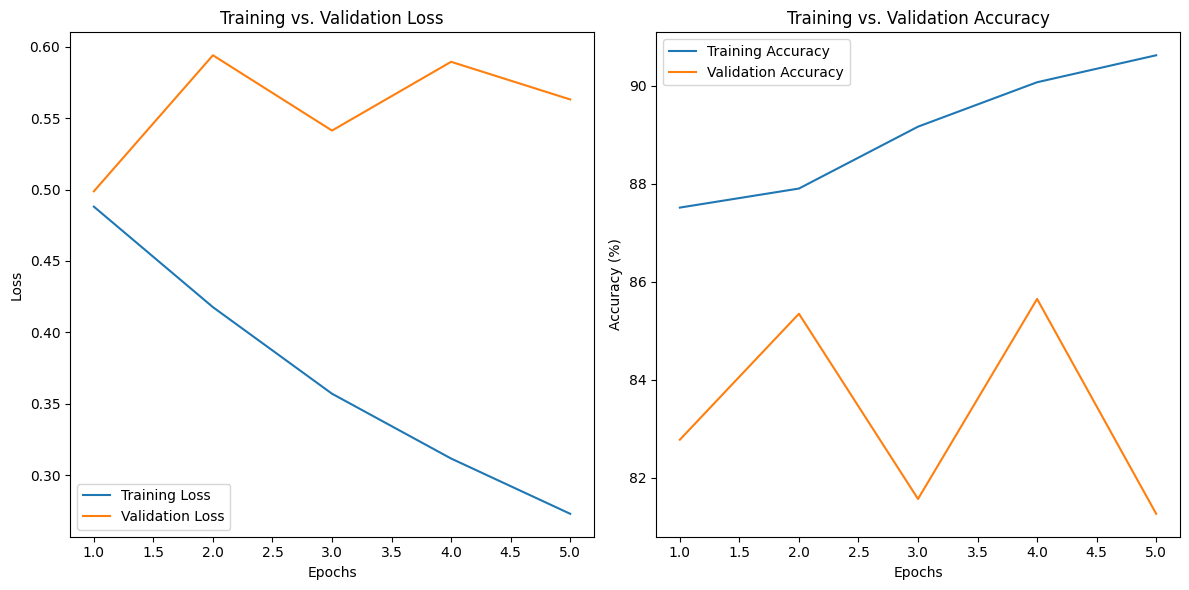

In [ ]:
import matplotlib.pyplot as plt

# Metrics storage
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Validation function
def evaluate_model():
    model.eval()
    total_loss, total_correct = 0, 0
    total_samples = 0

    with torch.no_grad():
        for data in dev_loader:
            ids = data['ids'].to(device)
            mask = data['mask'].to(device)
            token_type_ids = data['token_type_ids'].to(device)
            targets = data['targets'].to(device)

            outputs = model(ids, mask, token_type_ids)
            loss = loss_function(outputs, targets)

            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            total_correct += (preds == targets).sum().item()
            total_samples += targets.size(0)

    val_loss = total_loss / len(dev_loader)
    val_accuracy = total_correct / total_samples * 100
    return val_loss, val_accuracy

# Updated training function
def train_model(epoch):
    model.train()
    total_loss, total_correct = 0, 0
    total_samples = 0

    for data in tqdm(train_loader):
        ids = data['ids'].to(device)
        mask = data['mask'].to(device)
        token_type_ids = data['token_type_ids'].to(device)
        targets = data['targets'].to(device)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_function(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        total_correct += (preds == targets).sum().item()
        total_samples += targets.size(0)

    train_loss = total_loss / len(train_loader)
    train_accuracy = total_correct / total_samples * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    val_loss, val_accuracy = evaluate_model()
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}: Train Loss = {train_loss}, Train Accuracy = {train_accuracy}%")
    print(f"Validation Loss = {val_loss}, Validation Accuracy = {val_accuracy}%")

# Training Loop
for epoch in range(EPOCHS):
    train_model(epoch)

# Plotting metrics
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), train_losses, label='Training Loss')
plt.plot(range(1, EPOCHS + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, EPOCHS + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Define BERT Model Class
class BERTModel(torch.nn.Module):
    def __init__(self, n_classes):
        super(BERTModel, self).__init__()
        self.bert = AutoModel.from_pretrained(BERT_MODEL_NAME)
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, n_classes)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooler_output = self.pre_classifier(output.pooler_output)
        pooler_output = torch.nn.ReLU()(pooler_output)
        pooler_output = self.dropout(pooler_output)
        return self.classifier(pooler_output)

# Initialize tokenizer for BERT
bert_tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL_NAME)

# Create dataset and dataloader for BERT
bert_train_dataset = CustomDataset(train_df, bert_tokenizer, MAX_LEN)
bert_dev_dataset = CustomDataset(dev_df, bert_tokenizer, MAX_LEN)
bert_train_loader = DataLoader(bert_train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
bert_dev_loader = DataLoader(bert_dev_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)

# Initialize BERT model
bert_model = BERTModel(n_classes).to(device)

# Loss function and optimizer for BERT
bert_loss_function = torch.nn.CrossEntropyLoss(weight=class_weights)
bert_optimizer = torch.optim.Adam(params=bert_model.parameters(), lr=LEARNING_RATE)

# Training function for BERT
def train_bert_model(epoch):
    bert_model.train()
    total_loss, total_correct = 0, 0
    total_samples = 0

    for data in tqdm(bert_train_loader):
        ids = data['ids'].to(device)
        mask = data['mask'].to(device)
        token_type_ids = data['token_type_ids'].to(device)
        targets = data['targets'].to(device)

        outputs = bert_model(ids, mask, token_type_ids)
        loss = bert_loss_function(outputs, targets)

        bert_optimizer.zero_grad()
        loss.backward()
        bert_optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        total_correct += (preds == targets).sum().item()
        total_samples += targets.size(0)

    accuracy = total_correct / total_samples * 100
    print(f"Epoch {epoch + 1}: BERT Loss = {total_loss / len(bert_train_loader)}, Accuracy = {accuracy}%")

# Training Loop for BERT
for epoch in range(EPOCHS):
    train_bert_model(epoch)

# Save BERT model
torch.save(bert_model.state_dict(), 'bert_model_final.pt')
print("BERT Model saved successfully.")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 194/194 [01:40<00:00,  1.93it/s]


Epoch 1: BERT Loss = 0.9912632680738095, Accuracy = 65.09220317049498%


100%|██████████| 194/194 [01:40<00:00,  1.93it/s]


Epoch 2: BERT Loss = 0.5759309131613711, Accuracy = 83.37107732125526%


100%|██████████| 194/194 [01:40<00:00,  1.94it/s]


Epoch 3: BERT Loss = 0.40325784510404794, Accuracy = 86.57392429634423%


100%|██████████| 194/194 [01:40<00:00,  1.94it/s]


Epoch 4: BERT Loss = 0.2960883228626755, Accuracy = 89.25913943707539%


100%|██████████| 194/194 [01:40<00:00,  1.93it/s]


Epoch 5: BERT Loss = 0.21818149469063147, Accuracy = 91.52377871239081%
BERT Model saved successfully.


In [ ]:
from sklearn.metrics import classification_report

# Initialize variables to store predictions and true labels
all_targets = []
all_preds = []

# Training Loop for BERT
for epoch in range(EPOCHS):
    bert_model.train()
    total_loss, total_correct = 0, 0
    total_samples = 0

    for data in tqdm(bert_train_loader):
        ids = data['ids'].to(device)
        mask = data['mask'].to(device)
        token_type_ids = data['token_type_ids'].to(device)
        targets = data['targets'].to(device)

        outputs = bert_model(ids, mask, token_type_ids)
        loss = bert_loss_function(outputs, targets)

        bert_optimizer.zero_grad()
        loss.backward()
        bert_optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        total_correct += (preds == targets).sum().item()
        total_samples += targets.size(0)

        # Collect true labels and predictions for classification report
        all_targets.extend(targets.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

    accuracy = total_correct / total_samples * 100
    print(f"Epoch {epoch + 1}: BERT Loss = {total_loss / len(bert_train_loader)}, Accuracy = {accuracy}%")

# After training all epochs, generate the final classification report
print("\nFinal Classification Report (After All Epochs):")
report = classification_report(all_targets, all_preds, target_names=label_names, output_dict=True)

# Convert to DataFrame for better readability
report_df = pd.DataFrame(report).T  # Transpose the DataFrame
report_df = report_df[['precision', 'recall', 'f1-score']]  # Keep only relevant columns

# Adding Overall row
overall_precision = report_df['precision'].mean()
overall_recall = report_df['recall'].mean()
overall_f1 = report_df['f1-score'].mean()

overall_df = pd.DataFrame({
    'precision': [overall_precision],
    'recall': [overall_recall],
    'f1-score': [overall_f1]
}, index=['Overall'])

# Append overall metrics to the report
report_df = pd.concat([report_df, overall_df])

print(report_df)

# Optionally, save the best model if desired based on validation metrics
torch.save(bert_model.state_dict(), 'bert_model_final.pt')
print("BERT Model saved successfully.")


NameError: name 'EPOCHS' is not defined

In [ ]:
# Create dataset and dataloader for BERT test data
bert_test_dataset = CustomDataset(test_df, bert_tokenizer, MAX_LEN)
bert_test_loader = DataLoader(bert_test_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)


In [ ]:
def evaluate_bert_model():
    bert_model.eval()
    total_loss, total_correct = 0, 0
    total_samples = 0

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for data in tqdm(bert_test_loader):
            ids = data['ids'].to(device)
            mask = data['mask'].to(device)
            token_type_ids = data['token_type_ids'].to(device)
            targets = data['targets'].to(device)

            outputs = bert_model(ids, mask, token_type_ids)
            loss = bert_loss_function(outputs, targets)

            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            total_correct += (preds == targets).sum().item()
            total_samples += targets.size(0)

    accuracy = total_correct / total_samples * 100
    avg_loss = total_loss / len(bert_test_loader)
    print(f"Test Loss = {avg_loss}, Test Accuracy = {accuracy}%")


In [ ]:
# Evaluate the model on the test set
evaluate_bert_model()


100%|██████████| 42/42 [00:07<00:00,  5.72it/s]

Test Loss = 0.46494417424712864, Test Accuracy = 87.48114630467572%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=MAX_LEN)
X_train_tfidf = vectorizer.fit_transform(train_df['Text'])
X_dev_tfidf = vectorizer.transform(dev_df['Text'])
X_test_tfidf = vectorizer.transform(test_df['Text'])

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, train_df['Label'])

# Predictions and Evaluation
lr_preds = lr_model.predict(X_dev_tfidf)
lr_accuracy = accuracy_score(dev_df['Label'], lr_preds)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")

# Predictions and Evaluation on test dataset
lr_preds_test = lr_model.predict(X_test_tfidf)
lr_accuracy_test = accuracy_score(test_df['Label'], lr_preds_test)
print(f"Logistic Regression Accuracy on Test Data: {lr_accuracy_test * 100:.2f}%")

Logistic Regression Accuracy: 83.69%
Logistic Regression Accuracy on Test Data: 84.16%


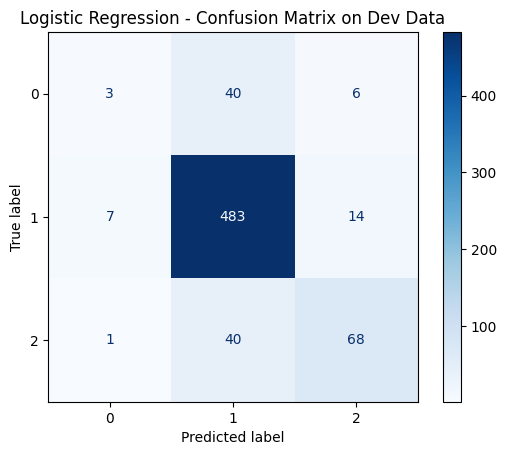

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
lr_conf_matrix = confusion_matrix(dev_df['Label'], lr_preds)
lr_conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix, display_labels=lr_model.classes_)

# Plot confusion matrix
lr_conf_matrix_display.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression - Confusion Matrix on Dev Data')
plt.show()


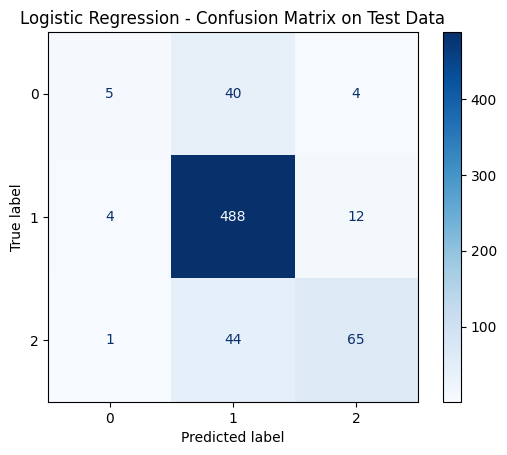

In [ ]:
# Predictions on Test Data
lr_preds_test = lr_model.predict(X_test_tfidf)

# Confusion Matrix on Test Data
lr_conf_matrix_test = confusion_matrix(test_df['Label'], lr_preds_test)
lr_conf_matrix_display_test = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix_test, display_labels=lr_model.classes_)

# Plot confusion matrix for Test Data
lr_conf_matrix_display_test.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression - Confusion Matrix on Test Data')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predictions on test data
lr_preds_test = lr_model.predict(X_test_tfidf)

# Generate classification report
print(classification_report(test_df['Label'], lr_preds_test))


              precision    recall  f1-score   support

           0       0.50      0.10      0.17        49
           1       0.85      0.97      0.91       504
           2       0.80      0.59      0.68       110

    accuracy                           0.84       663
   macro avg       0.72      0.55      0.59       663
weighted avg       0.82      0.84      0.81       663



Logistic Regression Accuracy on Dev Data with SMOTE: 80.21%


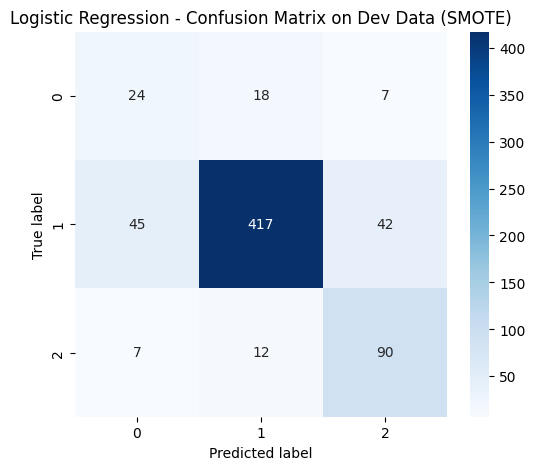

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.49      0.38        49
           1       0.93      0.83      0.88       504
           2       0.65      0.83      0.73       109

    accuracy                           0.80       662
   macro avg       0.63      0.71      0.66       662
weighted avg       0.84      0.80      0.82       662



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=MAX_LEN)
X_train_tfidf = vectorizer.fit_transform(train_df['Text'])
X_dev_tfidf = vectorizer.transform(dev_df['Text'])

# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, train_df['Label'])

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)

# Predictions and Evaluation
lr_preds = lr_model.predict(X_dev_tfidf)
lr_accuracy = accuracy_score(dev_df['Label'], lr_preds)

# Print Accuracy
print(f"Logistic Regression Accuracy on Dev Data with SMOTE: {lr_accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(dev_df['Label'], lr_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('Logistic Regression - Confusion Matrix on Dev Data (SMOTE)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(dev_df['Label'], lr_preds))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, train_df['Label'])

# Predictions and Evaluation
rf_preds = rf_model.predict(X_dev_tfidf)
rf_accuracy = accuracy_score(dev_df['Label'], rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Predictions and Evaluation on test dataset
rf_preds_test = rf_model.predict(X_test_tfidf)
rf_accuracy_test = accuracy_score(test_df['Label'], rf_preds_test)
print(f"Random Forest Accuracy on Test Data: {rf_accuracy_test * 100:.2f}%")

Random Forest Accuracy: 83.53%
Random Forest Accuracy on Test Data: 82.50%


In [ ]:
from sklearn.metrics import classification_report

# Predictions on test data
rf_preds_test = rf_model.predict(X_test_tfidf)

# Generate classification report
print(classification_report(test_df['Label'], rf_preds_test))


              precision    recall  f1-score   support

           0       0.38      0.12      0.18        49
           1       0.87      0.93      0.90       504
           2       0.68      0.67      0.68       110

    accuracy                           0.83       663
   macro avg       0.64      0.57      0.59       663
weighted avg       0.80      0.83      0.81       663



In [ ]:
import xgboost as xgb

# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_tfidf, train_df['Label'])

# Predictions and Evaluation
xgb_preds = xgb_model.predict(X_dev_tfidf)
xgb_accuracy = accuracy_score(dev_df['Label'], xgb_preds)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

# Predictions and Evaluation on test dataset
xgb_preds_test = xgb_model.predict(X_test_tfidf)
xgb_accuracy_test = accuracy_score(test_df['Label'], xgb_preds_test)
print(f"Accuracy on Test Data: {xgb_accuracy_test * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:46:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 85.05%
Accuracy on Test Data: 82.81%


In [ ]:
from sklearn.metrics import classification_report

# Predictions on test data
xgb_preds_test = xgb_model.predict(X_test_tfidf)

# Generate classification report
print(classification_report(test_df['Label'], xgb_preds_test))


              precision    recall  f1-score   support

           0       0.32      0.16      0.22        49
           1       0.89      0.92      0.90       504
           2       0.68      0.72      0.70       110

    accuracy                           0.83       663
   macro avg       0.63      0.60      0.60       663
weighted avg       0.81      0.83      0.82       663



In [ ]:
from sklearn.svm import SVC

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, train_df['Label'])

# Predictions and Evaluation
svm_preds = svm_model.predict(X_dev_tfidf)
svm_accuracy = accuracy_score(dev_df['Label'], svm_preds)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

# Predictions and Evaluation on test dataset
svm_preds_test = svm_model.predict(X_test_tfidf)
svm_accuracy_test = accuracy_score(test_df['Label'], svm_preds_test)
print(f" Accuracy on Test Data: {svm_accuracy_test * 100:.2f}%")

SVM Accuracy: 84.29%
 Accuracy on Test Data: 84.31%


In [ ]:
from sklearn.metrics import classification_report

# Predictions on test data
svm_preds_test = svm_model.predict(X_test_tfidf)

# Generate classification report
print(classification_report(test_df['Label'], svm_preds_test))


              precision    recall  f1-score   support

           0       0.50      0.06      0.11        49
           1       0.86      0.96      0.91       504
           2       0.77      0.65      0.70       110

    accuracy                           0.84       663
   macro avg       0.71      0.56      0.57       663
weighted avg       0.82      0.84      0.81       663



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, train_df['Label'])

# Predictions and Evaluation
nb_preds = nb_model.predict(X_dev_tfidf)
nb_accuracy = accuracy_score(dev_df['Label'], nb_preds)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

# Predictions and Evaluation on test dataset
nb_preds_test = nb_model.predict(X_test_tfidf)
nb_accuracy_test = accuracy_score(test_df['Label'], nb_preds_test)
print(f" Accuracy on Test Data: {nb_accuracy_test * 100:.2f}%")

Naive Bayes Accuracy: 80.51%
 Accuracy on Test Data: 80.09%


In [ ]:
from sklearn.metrics import classification_report

# Predictions on test data
nb_preds_test = nb_model.predict(X_test_tfidf)

# Generate classification report
print(classification_report(test_df['Label'], nb_preds_test))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.80      1.00      0.89       504
           2       0.88      0.25      0.39       110

    accuracy                           0.80       663
   macro avg       0.56      0.42      0.43       663
weighted avg       0.75      0.80      0.74       663



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
